# Laboratory Four - Classification II

In [3]:
import pandas as pd

firstdata = pd.read_csv('/Users/adunifekizitookoye/Desktop/CSCI 4150U - Data Mining/german.data',
                   header=None)
firstdata.columns = ['first']
split_data = firstdata['first'].str.split(" ")
data = split_data.to_list()
names = ['Status of existing checking account','Duration in month','Credit history',
         'Purpose','Credit amount','Savings account/bonds','Present employment since',
         'Installment rate in percentage of disposable income','Personal status and sex','Other debtors / guarantors',
         'Present residence since','Property','Age in years','Other installment plans','Housing',
         'Number of existing credits at this bank','Job',
         'Number of people being liable to provide maintenance for','Telephone','foreign worker', 'Class']
new_df = pd.DataFrame(data, columns=names)
new_df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
from sklearn import tree
Y = new_df['Class'].astype(str).astype(int)
X1 = new_df['Duration in month'].astype(str).astype(int)
X2 = new_df['Credit amount'].astype(str).astype(int)
X3 = [X1,X2]
X = pd.DataFrame(X3)

### Part I (inference efficiency):

#### Build a k-NN model and compare its efficiency with another model:

    1. Perform preprocessing (normalization) if it is necessary

In [5]:
import pandas as pd
data2 = pd.read_csv('/Users/adunifekizitookoye/Desktop/CSCI 4150U - Data Mining/waveform.data', header=None)
data2.columns = ['col1', 'col2', 'col3','col4','col5','col6','col7','col8','col9','col10','col11','col12','col13','col14',
                'col15','col16','col17','col18','col19','col20','col21','Class']
data2.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col13,col14,col15,col16,col17,col18,col19,col20,col21,Class
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


In [6]:
Y2 = data2['Class']
X2 = data2.drop(['Class'], axis=1)

    2. Build k-NN classifier for k = 5: 
        A. Use 90% of data set for the train and 10 % for the test, and perform evaluation 5 times, the final results are the average of trails performance.

In [7]:
#Part 1, 2B - '...final average F-measure'
import matplotlib.pyplot as plt
%matplotlib inline
######################################
#training and test set creation
######################################

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import time

from sklearn import tree
from sklearn.metrics import recall_score


indexes = [0,1,2,3,4]
#indexes = [1,2,3,4,5]
trainScore = [] #recall
testScore = [] #recall

start_time = time.time()
for indexe in indexes:
    #test_size = 0.1 since using 10% of daata for the test
    X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.9)
    clf = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
trainScore = [] #recall
testScore = [] #recall

end_time = time.time()

        B. You should report the final average F-measure, and average test time (the time that model spends to predict labels for the test dataset instances). Use bar charts.

training set F-measure 0.8868
testing set F-measure 0.8092
Time spent to predict: 0.9534008502960205


Text(0, 0.5, 'F-measure')

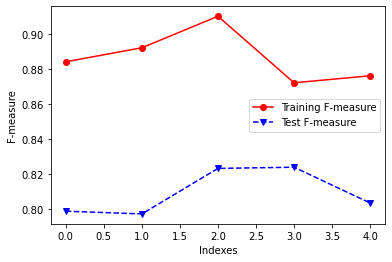

In [8]:
import numpy as np
print("training set F-measure", np.mean(trainScore))
print("testing set F-measure", np.mean(testScore))

print("Time spent to predict:",end_time-start_time)
time = end_time - start_time
plt.plot(indexes, trainScore, 'ro-', indexes, testScore, 'bv--')
plt.legend(['Training F-measure', 'Test F-measure'])
plt.xlabel('Indexes')
plt.ylabel('F-measure')

    3. Repeat (2) for building a decision tree classifier (use default parameters). 


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
######################################
#training and test set creation
######################################

from sklearn.model_selection import train_test_split

import time

from sklearn import tree
from sklearn.metrics import recall_score

indexes = [0,1,2,3,4] #using default parameters from step 2
trainScore1 = [] #recall
testScore1 = [] #recall

start_time1 = time.time()
for i in range(4):
    X_train, X_test, Y_train, Y_test, = train_test_split(X.T, Y, test_size=0.9)
    clf = tree.DecisionTreeClassifier(max_depth=3)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainScore1.append(recall_score(Y_train, Y_predTrain))
    testScore1.append(recall_score(Y_test, Y_predTest))
end_time1 = time.time()

training set F-measure 1.0
testing set F-measure 0.8614649681528663


Text(0, 0.5, 'F-measure')

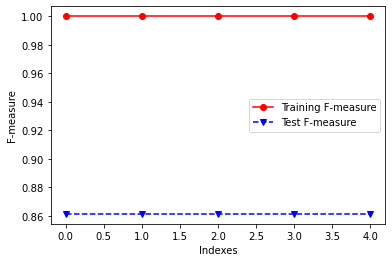

In [8]:
import numpy as np
print("training set F-measure", np.mean(trainScore1))
print("testing set F-measure", np.mean(testScore1))

print("Time spent to predict:",end_time1 - start_time1)
time1 = end_time1 - start_time1
plt.plot(indexes, trainScore1, 'ro-',indexes, testScore1, 'bv--')
plt.legend(['Training F-measure', 'Test F-measure'])
plt.xlabel('Indexes')
plt.ylabel('F-measure')

    4. Compare results of part (2) and (3) using appropriate charts

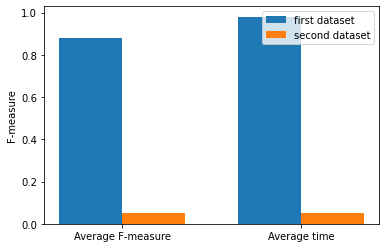

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['Average F-measure', 'Average time']
avgfscore = []
avgtime = []

avgfscore.append(np.mean(trainScore))
avgfscore.append(np.mean(trainScore1))
avgtime.append(time)
avgtime.append(time1)

x = np.arange(len(labels)) #the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avgfscore, width, label='first dataset')
rects2 = ax.bar(x + width/2, avgtime, width, label='second dataset')

#Add some text for labesl, title and custom x-axis tick labels, etc
ax.set_ylabel('F-measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

### Part II (model selection):  
   #### Perform model selection for the k-NN and decision tree:

    1. Perform preprocessing (normalization) if it is necessary

In [9]:
import pandas as pd
data2 = pd.read_csv('/Users/adunifekizitookoye/Desktop/CSCI 4150U - Data Mining/waveform.data', header=None)
data2.columns = ['col1', 'col2', 'col3','col4','col5','col6','col7','col8','col9','col10','col11','col12','col13','col14',
                'col15','col16','col17','col18','col19','col20','col21','Class']
data2.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col13,col14,col15,col16,col17,col18,col19,col20,col21,Class
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


In [10]:
Y2 = data2['Class']
X2 = data2.drop(['Class'], axis=1)

    2. Build k-NN classifier for different k (1, 2, 3, 4, 5) and select the best k: 
        A. Use 90% of data set for train and 10 % for the test,  and 10% of the train for validation

In [38]:
#Part 1, 2B - '...final average F-measure'
import matplotlib.pyplot as plt
%matplotlib inline
######################################
#training and test set creation
######################################

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import time

from sklearn import tree
from sklearn.metrics import recall_score


indexes = [1,2,3,4,5]
trainScore2 = [] #recall
testScore2 = [] #recall

start_time2 = time.time()
for indexe in indexes:
    #test_size = 0.1 since using 10% of daata for the test
    X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.9)
    clf = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=3)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainScore2.append(recall_score(Y_train, Y_predTrain, average='micro'))
    testScore2.append(recall_score(Y_test, Y_predTest, average='micro'))
end_time2 = time.time()

        B. Build the k-NN model using the train data set and select the best k based on F-measure on the validation set

training set F-measure 0.89
testing set F-measure 0.8097333333333333
Time spent to predict: 3.7792000770568848


Text(0, 0.5, 'F-measure')

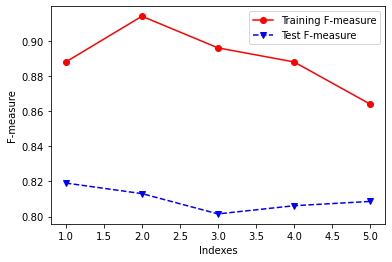

In [39]:
import numpy as np
print("training set F-measure", np.mean(trainScore2))
print("testing set F-measure", np.mean(testScore2))

print("Time spent to predict:",end_time2-start_time2)
time2 = end_time2 - start_time2
plt.plot(indexes, trainScore2, 'ro-',indexes, testScore2, 'bv--')
plt.legend(['Training F-measure', 'Test F-measure'])
plt.xlabel('Indexes')
plt.ylabel('F-measure')

    3. Build the decision tree model using the train data set and select the best tree:
        A. Change the tree depth (3, 4...10) and calculate F-measure on the validation set


In [40]:
from numpy.random import random
import matplotlib.pyplot as plt
%matplotlib inline
######################################
#training and test set creation
######################################

from sklearn.model_selection import train_test_split

import time

from sklearn import tree
from sklearn.metrics import recall_score

maxdepths = list(range(3,11,1))

trainScore3 = [] #recall
testScore3 = [] #recall

start_time3 = time.time()
index = 0
for dpth in maxdepths:
    X_train, X_test, Y_train, Y_test, = train_test_split(X.T, Y, test_size=0.9)
    clf = tree.DecisionTreeClassifier(max_depth=dpth)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainScore3.append(recall_score(Y_train, Y_predTrain))
    testScore3.append(recall_score(Y_test, Y_predTest))

end_time3 = time.time()

training set F-measure 0.9716760103757007
testing set F-measure 0.8097099159436735
Time spent to predict: 0.047515869140625


Text(0, 0.5, 'F-measure')

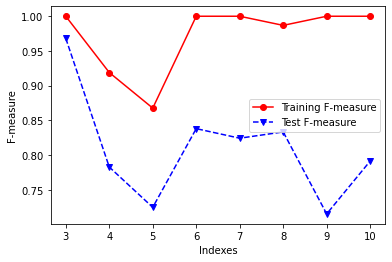

In [41]:
import numpy as np
print("training set F-measure", np.mean(trainScore3))
print("testing set F-measure", np.mean(testScore3))

print("Time spent to predict:",end_time3 -start_time3)
time3 = end_time3 - start_time3
plt.plot(maxdepths, trainScore3, 'ro-',maxdepths, testScore3, 'bv--')
plt.legend(['Training F-measure', 'Test F-measure'])
plt.xlabel('Indexes')
plt.ylabel('F-measure')

        B. Compare results of part (2) and (3) using the appropriate charts

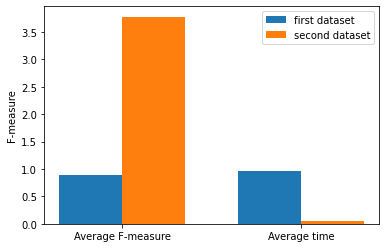

In [54]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['Average F-measure', 'Average time']
avgfscore = []
avgtime = []

avgfscore.append(np.mean(trainScore2))
avgfscore.append(np.mean(trainScore3))
avgtime.append(time2)
avgtime.append(time3)

x = np.arange(len(labels)) #the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avgfscore, width, label='first dataset')
rects2 = ax.bar(x + width/2, avgtime, width, label='second dataset')

#Add some text for labesl, title and custom x-axis tick labels, etc
ax.set_ylabel('F-measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

### Comparisons of training score of KNN for Part I and Part II

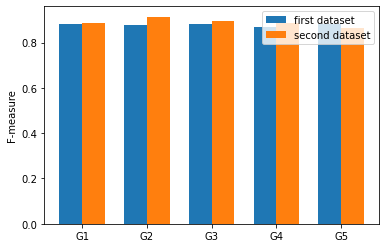

In [55]:
#Part 2, 3B
import matplotlib
import matplotlib
import numpy as np

labels = ['G1', 'G2', 'G3', 'G4', 'G5']

x = np.arange(len(labels)) #the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, trainScore, width, label='first dataset')
rects2 = ax.bar(x + width/2, trainScore2, width, label='second dataset')

#Add some text for labesl, title and custom x-axis tick labels, etc
ax.set_ylabel('F-measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()